# Titanic passenger data analysis

Alain Roghi - alain.roghi@airbus.com


This document is an a analysis of the Titanic passenger data.
This analysis is based on data set titanic-data.csv downloaded from the Udacity P2 project page.

## Background information (extract from Wikipedia)

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The largest ship afloat at the time it entered service, the RMS Titanic was the second of three Olympic class ocean liners operated by the White Star Line, and was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.


## Problem statement

We want to be able to answer the following questions:
* What is percentage of surviving people for each passenger class
* Is there a correlation between surviving people of their respective passenger class
* What is the percentage of surviving people per gender
* What is the age distribution of surviving and died people
* What was the average fare per passenger class and associated standard deviation (paying passengers only)



In [66]:
%matplotlib inline
%pylab inline

import numpy as np
import pandas as pd
import seaborn as sns

# Loading dataset
path = './'
passengers = pd.read_csv(path + 'titanic-data.csv')
passengers.head(3)



Populating the interactive namespace from numpy and matplotlib


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

# Data format (source : Kaggle web site - https://www.kaggle.com/c/titanic/data)

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Q ueenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

# Data exploration

We can already notice there are discrepencies between the file and the content description. Some headers are either not the same (Survived vs survival) or written with a different case (pclass vs Pclass).

We can also see that some information are not described (for instance the Fare for which we do not know the associated currency).

We will perform some basic data exploration on the whole file in order to check data quality.




In [67]:
print "Number of values in each column"
print passengers.count()


print "\nCheck if their is non described values is some columns"
print "Survived %s" % passengers['Survived'].unique()
print "Pclass   %s" % passengers['Pclass'].unique()
print "Sex      %s" % passengers['Sex'].unique()
print "SibSp    %s" % passengers['SibSp'].unique()
print "Parch    %s" % passengers['Parch'].unique()
print "Embarked %s" % passengers['Embarked'].unique()


Number of values in each column
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Check if their is non described values is some columns
Survived [0 1]
Pclass   [3 1 2]
Sex      ['male' 'female']
SibSp    [1 0 3 4 2 5 8]
Parch    [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


# Data modification

We will apply two modifications.
1st: We will change the value of the survived column in order to be more explicit than 0 and 1.
2nd: We are interested about people being on board of the Titanic. We will excluded people with an Embarked harbour value


In [68]:

def setlabel(row):
    newrow = row
    if newrow['Survived'] == 0:
        # newrow['Survived'] = 'Survived' 
        newrow.loc['SurvivedT'] = 'Died'
    elif newrow['Survived'] == 1:
        # newrow['Survived'] = 'Survived' 
        newrow.loc['SurvivedT'] = 'Survived'
    return newrow

# Add a new text column to a string to have a more readable information
passengers = passengers.apply(setlabel,axis='columns')

# Remove non boarding passengers
passengers = passengers[(passengers['Embarked'] == 'Q') | (passengers['Embarked'] == 'S') | (passengers['Embarked'] == 'C')]

# Check modification
passengers.head(3)




PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked SurvivedT  
0      0         A/5 21171   7.2500   NaN        S      Died  
1      0          PC 17599  71.2833   C85        C  Survived  
2      0  STON/O2. 3101282   7.9250   NaN        S  Survived

In [69]:
print passengers.count()
print "Embarked %s" % passengers['Embarked'].unique()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            712
SibSp          889
Parch          889
Ticket         889
Fare           889
Cabin          202
Embarked       889
SurvivedT      889
dtype: int64
Embarked ['S' 'C' 'Q']


From this basic analysis, we can already identify some missing information in the 'Age','Cabin' and 'Embarked' columns.



# Question 1

•What is percentage of surviving people for each passenger class


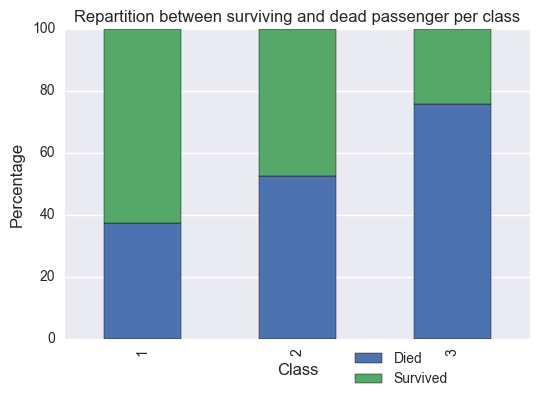

In [70]:
%matplotlib inline

# this function normalise from aboslute values to percentage all figures from a data serie
def normalise(row):
    return 100 * row / row.sum()

# this function display a stacked bar chart with corresponding labels and titles
def plotstackedbar(data,label1,label2,leftanchor,xlabel,ylabel,title):
    chart = data.plot.bar(stacked = True)

    # modify legend
    handles, labels = chart.get_legend_handles_labels()
    labels[0] = label1
    labels[1] = label2
    chart.legend(handles, labels,bbox_to_anchor=(leftanchor, 0))

    # Set titles
    chart.set_xlabel(xlabel, fontsize=12)
    chart.set_ylabel(ylabel, fontsize=12)
    chart.set_title(title, fontsize=12)
    
survival_per_class = passengers.groupby(['Pclass','Survived'])['PassengerId']
data =  survival_per_class.count().unstack()
data = data.apply(normalise, axis='columns')

plotstackedbar(data,'Died','Survived',0.85,'Class','Percentage','Repartition between surviving and dead passenger per class')



# Question 1 conclusion

We see that better the travel class was, better the survival rate was.

# Question 2

•Is there a correlation between surviving people of their respective passenger class


In [71]:
print passengers.corr(method='pearson')


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.033681 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.082446 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.365902  0.081656  0.016824   
Age             0.033681 -0.082446 -0.365902  1.000000 -0.307351 -0.187896   
SibSp          -0.057686 -0.034040  0.081656 -0.307351  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.187896  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.093143  0.160887  0.217532   

                 Fare  
PassengerId  0.012703  
Survived     0.255290  
Pclass      -0.548193  
Age          0.093143  
SibSp        0.160887  
Parch        0.217532  
Fare         1.000000  


# Question 2 conclusion

We have a correlation factor of -0.335549 between passenger class and the fact people survived.
It confirms the conclusion of question 1.


# Question 3

•What is the percentage of surviving people per gender


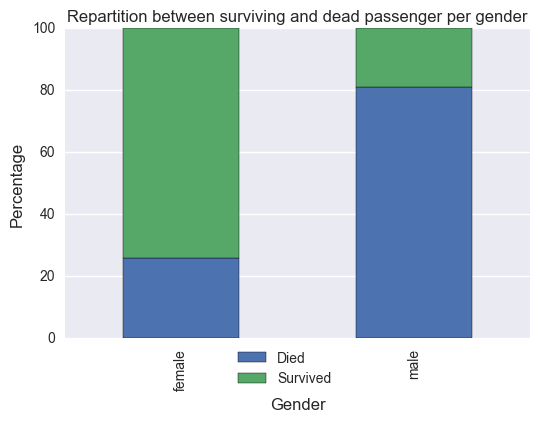

In [72]:
survival_per_gender = passengers.groupby(['Sex','Survived'])['PassengerId']
data =  survival_per_gender.count().unstack()
data = data.apply(normalise, axis='columns')

plotstackedbar(data,'Died','Survived',0.6,'Gender','Percentage','Repartition between surviving and dead passenger per gender')
               

# Question 3 conclusion

Percentage of surviving female is greater than percentage of surviving male.


# Question 4

* What is the age distribution of surviving and died people


PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Cabin          183
Embarked       712
SurvivedT      712
dtype: int64


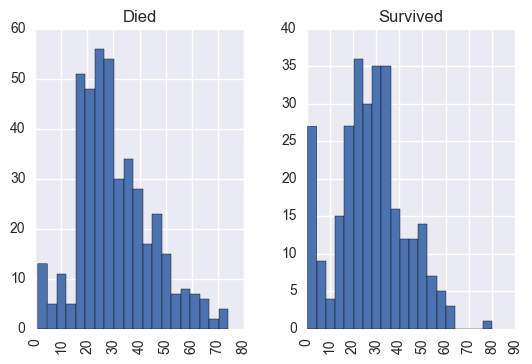

In [73]:
valid_age = passengers[(passengers['Age'] > 0 )]
valid_age['Age'].hist(by=passengers['SurvivedT'],bins=20)
print valid_age.count()


# Question 4 conclusion

We can see that the two histogram have a similar shape except for infant.


# Question 5

•What was the average fare per passenger class and associated standard deviation (paying passengers only)


In [74]:
# We filter first passenger that did not pay
data= passengers[passengers['Fare'] > 0]
data['Fare'].describe()


count    874.000000
mean      32.647539
std       49.942710
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

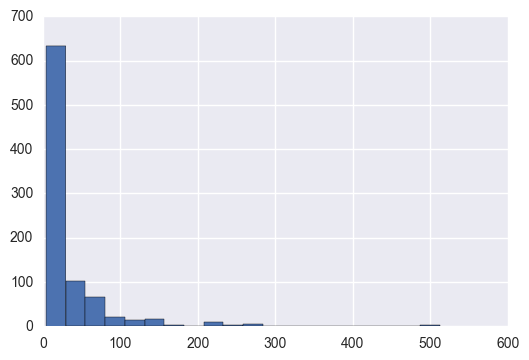

In [75]:
# plot histogram
data['Fare'].hist(bins=20)

# Question 5 conclusion

The average fare is 32 (currency?) but 50% of the passengers paid less than 14.5 (currency?).

We can also see a strange bar at the right of the histogram with a fair much higher than the rest of the passengers.


# Conclusion

We performed some statistics on Titanic passengers information.
We can see some information, but we can not draw any conclusion of the reasons behind our observations for several reason:

* We have only a sample of Titanic passenger data (892 over 2224 people). We do not know how this sample was created and if it has any biaised in it.
* We are missing some factual information about the way the disaster was managed on the ship. For instance, we see that there were more (in proportion) 1st class survival than 3rd class survival. The reason may be that 1st class people were closer from rescue boats, or that they were considered as prioritary people to go on board of the rescue boat. It could also be for both reasons or for any kind of other reasons. We need a proper investigation to know more about that.



# Reference

In order to perform this project, I used to following information sources:
* Pandas official website: http://pandas.pydata.org/
* Matplotlib official website: http://matplotlib.org/
* Different forums but mainly stackoverflow : http://stackoverflow.com/

